# importing all the modules and packages

In [89]:
import numpy as np
import pandas as pd
import math
import collections
from itertools import permutations
import seaborn as sns

In [44]:
df=pd.read_csv('language.csv')
df=df.dropna()
df['text']=df['text'].astype(str)
df['language']=df['language'].astype(str)

# create set of features

In [45]:
pun=("?","-",".",",","\''", ';' ,"/",'!')
vow=['a','e','i','o','u']
dou_vow=['aa','ee','ii','oo','uu']
con_vow=[''.join(p) for p in permutations(vow,2)]
dutch_com=['ij']

In [84]:
df['word_count']=df['text'].apply(lambda x: len(x.split()))
df['character_count']=df['text'].apply(lambda x: len(x.replace(" ","")))
df['word_density']=df['word_count']/(df['character_count']+1)
df['punc_count']=df['text'].apply(lambda x: len([a for a in x if a in pun]))
df['v_char_count']=df['text'].apply(lambda x: len([a for a in x if a.casefold()=='v']))
df['w_char_count']=df['text'].apply(lambda x: len([a for a in x if a.casefold()=='w']))
df['ij_char_count']=df['text'].apply(lambda x: sum([any(a_b in a for a_b in dutch_com) for a in x.split()]))
df['dou_vow_count']=df['text'].apply(lambda x: sum([any(a_b in a for a_b in dou_vow) for a in x.split()]))
df['con_vow_count']=df['text'].apply(lambda x: sum([any(a_b in a for a_b in con_vow) for a in x.split()]))
df['vow_char_count']=df['text'].apply(lambda x: len([a for a in x if a in vow]))
df['vow_density']=df['vow_char_count']/df['word_count']
df['capitals']=df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['cap_vs_character']=df['capitals']/df['character_count']
df['exclamation_count']=df['text'].apply(lambda x: x.count('!'))
df['Question_count']=df['text'].apply(lambda x: x.count('?'))
df['unique_words']=df['text'].apply(lambda x: len(set(w for w in x.split())))
df['repeat words']=df['text'].apply(lambda x: len([w for w in collections.Counter(x.split()).values() if w > 1]))
df['words_vs_unique']=df['unique_words']/df['word_count']
df['encode']=np.nan

for i in range(len(df)):
    try:
        df['text'].iloc[i].encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        df['encode'].iloc[i]=0
    else:
        df['encode'].iloc[i]=1

C:\Users\Raj Krishna Mondal\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [85]:
df

,text,language,word_count,character_count,word_density,punc_count,vow_char_count,v_char_count,w_char_count,ij_char_count,...,vow_density,capitals,cap_vs_character,exclamation_count,Question_count,num_punc,unique_words,repeat words,words_vs_unique,encode
0,Ship shape and Bristol fashion,English,5,26,0.185185,0,9,0,0,0,...,1.800000,2,0.076923,0,0,0,5,0,1.000000,1.0
1,Know the ropes,English,3,12,0.230769,0,4,0,1,0,...,1.333333,1,0.083333,0,0,0,3,0,1.000000,1.0
2,Graveyard shift,English,2,14,0.133333,0,4,1,0,0,...,2.000000,1,0.071429,0,0,0,2,0,1.000000,1.0
3,Milk of human kindness,English,4,19,0.200000,0,6,0,0,0,...,1.500000,1,0.052632,0,0,0,4,0,1.000000,1.0
4,Touch with a barge-pole - Wouldn't,English,6,29,0.200000,2,10,0,2,0,...,1.666667,2,0.068966,0,0,2,6,0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Daar’s ‘n geurtjie aan.,Afrikaans,4,20,0.190476,1,8,0,0,0,...,2.000000,1,0.050000,0,0,1,4,0,1.000000,0.0
2835,Men's evil manners live in brass; their virtue...,English,12,54,0.218182,1,20,3,3,0,...,1.666667,1,0.018519,0,0,1,11,1,0.916667,1.0
2836,Go-faster,English,1,9,0.100000,1,3,0,0,0,...,3.000000,1,0.111111,0,0,1,1,0,1.000000,1.0
2837,Red tape,English,2,7,0.250000,0,3,0,0,0,...,1.500000,1,0.142857,0,0,0,2,0,1.000000,1.0


In [86]:
df.groupby('language').mean().T

language,Afrikaans,English,Nederlands
word_count,10.503912,4.072506,5.746269
character_count,43.541471,16.841849,26.074627
word_density,0.234060,0.226490,0.209378
punc_count,1.492958,0.236983,1.223881
vow_char_count,17.192488,5.906569,10.119403
v_char_count,0.652582,0.126521,0.358209
w_char_count,0.904538,0.291971,0.522388
ij_char_count,0.000000,0.000000,0.268657
dou_vow_count,1.696401,0.178589,1.014925
con_vow_count,2.773083,0.536253,1.134328


# degree of correlation between the characteristics


In [87]:
df.corr(method='pearson')

,word_count,character_count,word_density,punc_count,vow_char_count,v_char_count,w_char_count,ij_char_count,dou_vow_count,con_vow_count,vow_density,capitals,cap_vs_character,exclamation_count,Question_count,num_punc,unique_words,repeat words,words_vs_unique,encode
word_count,1.000000,0.963818,0.284142,0.666048,0.947997,0.499937,0.576566,0.002617,0.714460,0.769932,-0.116296,0.408048,-0.449626,0.161356,0.054530,0.666048,0.985286,0.785662,-0.609634,-0.500432
character_count,0.963818,1.000000,0.066516,0.697728,0.981940,0.535066,0.579176,0.012066,0.737948,0.801404,0.048686,0.409393,-0.486624,0.174488,0.065903,0.697728,0.950250,0.751124,-0.570829,-0.506098
word_density,0.284142,0.066516,1.000000,-0.001453,0.078986,0.002239,0.061311,-0.032624,0.050620,0.042554,-0.734987,0.081018,0.062398,-0.011030,0.001162,-0.001453,0.306803,0.143736,-0.178659,-0.077037
punc_count,0.666048,0.697728,-0.001453,1.000000,0.667116,0.390064,0.382000,0.048226,0.577274,0.585538,0.111669,0.401829,-0.274015,0.210589,0.108773,1.000000,0.658658,0.509466,-0.399844,-0.423790
vow_char_count,0.947997,0.981940,0.078986,0.667116,1.000000,0.531019,0.557842,0.006412,0.764295,0.852583,0.111546,0.354090,-0.491909,0.163905,0.058114,0.667116,0.933525,0.745589,-0.570743,-0.485502
v_char_count,0.499937,0.535066,0.002239,0.390064,0.531019,1.000000,0.233034,0.022992,0.389565,0.424615,0.062263,0.250590,-0.249199,0.095870,0.025231,0.390064,0.502898,0.367544,-0.287014,-0.337758
w_char_count,0.576566,0.579176,0.061311,0.382000,0.557842,0.233034,1.000000,0.005225,0.468219,0.413632,-0.013488,0.204286,-0.280512,0.111205,0.101982,0.382000,0.562223,0.464511,-0.353433,-0.298730
ij_char_count,0.002617,0.012066,-0.032624,0.048226,0.006412,0.022992,0.005225,1.000000,0.000365,-0.010899,0.014372,-0.021422,-0.048555,-0.007353,-0.007675,0.048226,0.007278,-0.016064,0.017089,0.023861
dou_vow_count,0.714460,0.737948,0.050620,0.577274,0.764295,0.389565,0.468219,0.000365,1.000000,0.588212,0.112322,0.245026,-0.352140,0.174573,0.040402,0.577274,0.705972,0.563045,-0.412084,-0.471362
con_vow_count,0.769932,0.801404,0.042554,0.585538,0.852583,0.424615,0.413632,-0.010899,0.588212,1.000000,0.176553,0.286679,-0.401469,0.121268,0.033055,0.585538,0.759246,0.604320,-0.452598,-0.436547


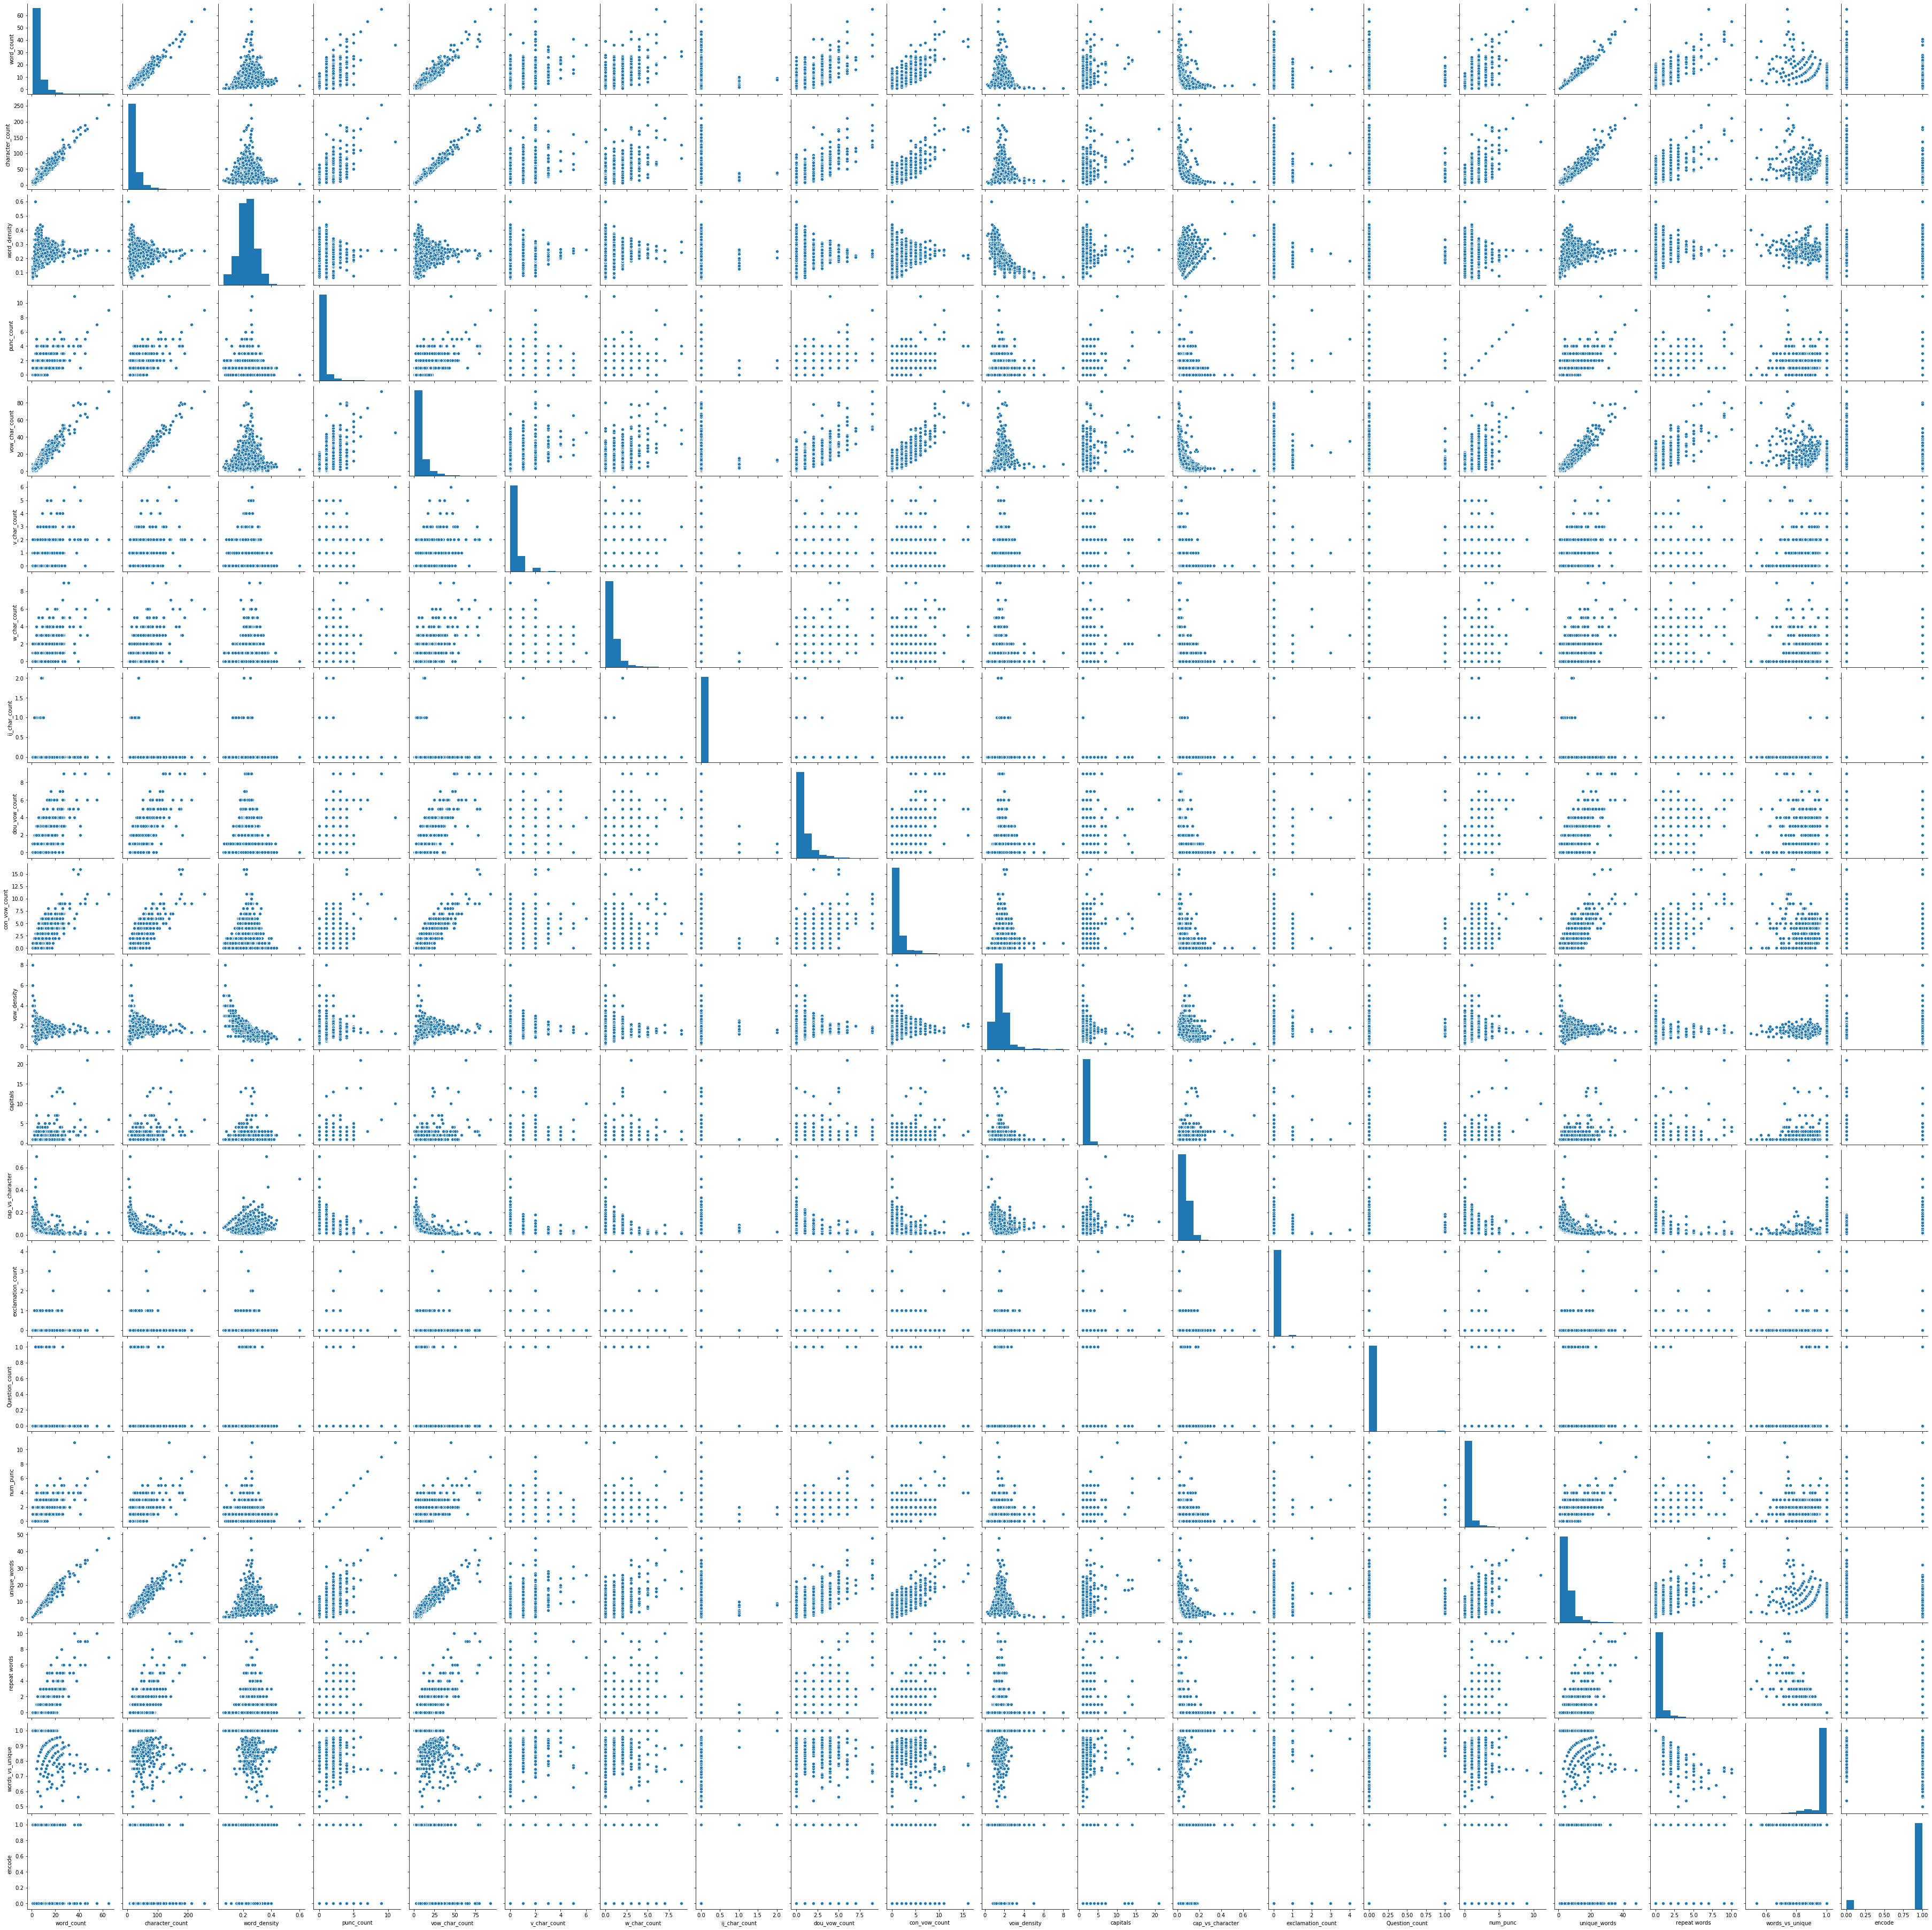

In [90]:
sns.pairplot(df)

# Splitting The Data

In [99]:
from sklearn.model_selection import train_test_split
features_col=list(df.columns)[2:]
x=df[features_col]
y=df[['language']]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [103]:
x_test.shape

(553, 20)

# reduce the correlation

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale=StandardScaler()
scale.fit(x_train)

x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

pca=PCA(0.95)

pca.fit(x_train)

print('no of principle component='+str(pca.n_components_))

x_train=pca.transform(x_train)
x_test=pca.transform(x_test)

no of principle component=12


In [109]:
x_test.shape

(553, 12)

# Apply ML Model

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import pickle

In [132]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)

dt_model="dt_model.pkl"
with open(dt_model, 'wb') as file:
    pickle.dump(dt_clf, file)
    
with open(dt_model, 'rb') as file:
    dt_clf=pickle.load(file)
    
dt_clf

y_predict=dt_clf.predict(x_test)

acc=accuracy_score(y_test, y_predict)

print(acc)

0.9258589511754068


Text(0.5, 1, 'Decision tree Accuracy score=92.586%')

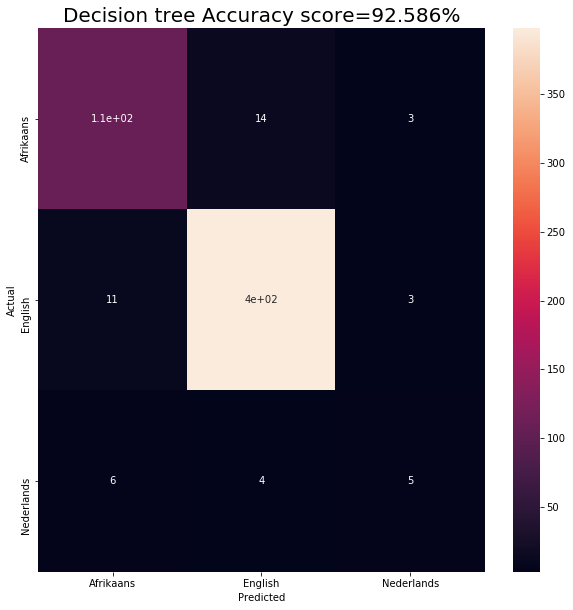

In [141]:
import matplotlib.pyplot as plt
label=['Afrikaans','English','Nederlands']

confusion_matrix_dt=confusion_matrix(y_test,y_predict, label)
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot(111)
sns.heatmap(confusion_matrix_dt, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

ax.set_xticklabels(label)
ax.set_yticklabels(label)

title='Decision tree Accuracy score='+str(round(acc*100,3))+"%"
plt.title(title, size=20)

In [135]:
confusion_matrix_dt

array([[109,  14,   3],
       [ 11, 398,   3],
       [  6,   4,   5]], dtype=int64)